In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

In [2]:
df= pd.read_csv(r'C:\Users\OFFICE INFO\Desktop\python\titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [4]:
df = df.drop( columns = ['cabin', 'ticket'] )

In [5]:
df['pclass'].fillna(df['pclass'].mean(),inplace=True)
df['survived'].fillna(df['survived'].median(),inplace=True)
df['age'].fillna(df['age'].median(),inplace =True)
df['sibsp'].fillna(df['sibsp'].mean(),inplace=True)
df['body'].fillna(df['body'].mean(), inplace = True)
df['parch'].fillna(df['parch'].median(), inplace= True)
df['fare'].fillna(df['fare'].median(),inplace=True)

In [6]:
print(df.isnull().sum())

pclass         0
survived       0
name           1
sex            1
age            0
sibsp          0
parch          0
fare           0
embarked       3
boat         824
body           0
home.dest    565
dtype: int64


In [7]:
print(df['embarked'].value_counts ())

S    914
C    270
Q    123
Name: embarked, dtype: int64


In [8]:
df['embarked'].fillna('S' , inplace = True)

In [9]:
print(df['home.dest'].value_counts())

New York, NY                        64
London                              14
Montreal, PQ                        10
Cornwall / Akron, OH                 9
Paris, France                        9
                                    ..
Co Cork, Ireland Charlestown, MA     1
Brighton, Sussex                     1
St James, Long Island, NY            1
Cincinatti, OH                       1
Belmont, MA                          1
Name: home.dest, Length: 369, dtype: int64


In [10]:
df['home.dest'].fillna('New York, NY' , inplace = True)

In [11]:
print(df['boat'].value_counts())

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
16         23
7          23
8          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
C D         2
13 15       2
5 7         2
15 16       1
5 9         1
8 10        1
13 15 B     1
Name: boat, dtype: int64


In [12]:
df['boat'].fillna('13' , inplace = True)

In [13]:
print(df['sex'].value_counts())

male      843
female    466
Name: sex, dtype: int64


In [14]:
df['sex'].fillna('male' , inplace = True)

In [15]:
print(df.isnull().sum())

pclass       0
survived     0
name         1
sex          0
age          0
sibsp        0
parch        0
fare         0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [16]:
print(df['name'].value_counts())

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Nilsson, Miss. Helmina Josefina                        1
Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)    1
Pasic, Mr. Jakob                                       1
                                                      ..
Matinoff, Mr. Nicola                                   1
Long, Mr. Milton Clyde                                 1
Thorne, Mrs. Gertrude Maybelle                         1
Oreskovic, Miss. Jelka                                 1
Robins, Mrs. Alexander A (Grace Charity Laury)         1
Name: name, Length: 1307, dtype: int64


In [17]:
df['name'].fillna('Connolly, Miss. Kate',inplace=True)

In [18]:
print(df.isnull().sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
fare         0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [19]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1.000000,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.000000,0.0,211.3375,S,2,160.809917,"St Louis, MO"
1,1.000000,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.000000,2.0,151.5500,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1.000000,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.000000,2.0,151.5500,S,13,160.809917,"Montreal, PQ / Chesterville, ON"
3,1.000000,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.000000,2.0,151.5500,S,13,135.000000,"Montreal, PQ / Chesterville, ON"
4,1.000000,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.000000,2.0,151.5500,S,13,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.000000,0.0,"Zabour, Miss. Thamine",female,28.0000,1.000000,0.0,14.4542,C,13,160.809917,"New York, NY"
1306,3.000000,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.000000,0.0,7.2250,C,13,304.000000,"New York, NY"
1307,3.000000,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.000000,0.0,7.2250,C,13,160.809917,"New York, NY"
1308,3.000000,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.000000,0.0,7.8750,S,13,160.809917,"New York, NY"


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['boat'] = encoder.fit_transform(df['boat'])
df['name']=encoder.fit_transform(df['name'])
df['home.dest'] = encoder.fit_transform (df['home.dest'])
df['embarked'] = encoder.fit_transform (df['embarked'])

In [22]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1.000000,1.0,21,female,29.0000,0.000000,0.0,211.3375,2,11,160.809917,308
1,1.000000,1.0,23,male,0.9167,1.000000,2.0,151.5500,2,2,160.809917,230
2,1.000000,0.0,24,female,2.0000,1.000000,2.0,151.5500,2,4,160.809917,230
3,1.000000,0.0,25,male,30.0000,1.000000,2.0,151.5500,2,4,135.000000,230
4,1.000000,0.0,26,female,25.0000,1.000000,2.0,151.5500,2,4,160.809917,230
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.000000,0.0,1292,female,28.0000,1.000000,0.0,14.4542,0,4,160.809917,236
1306,3.000000,0.0,1293,male,26.5000,0.000000,0.0,7.2250,0,4,304.000000,236
1307,3.000000,0.0,1294,male,27.0000,0.000000,0.0,7.2250,0,4,160.809917,236
1308,3.000000,0.0,1295,male,29.0000,0.000000,0.0,7.8750,2,4,160.809917,236


In [23]:
df[df['survived']==1]['sex'].value_counts()

female    339
male      161
Name: sex, dtype: int64

In [24]:
df[df['survived']==0]['sex'].value_counts()

male      683
female    127
Name: sex, dtype: int64

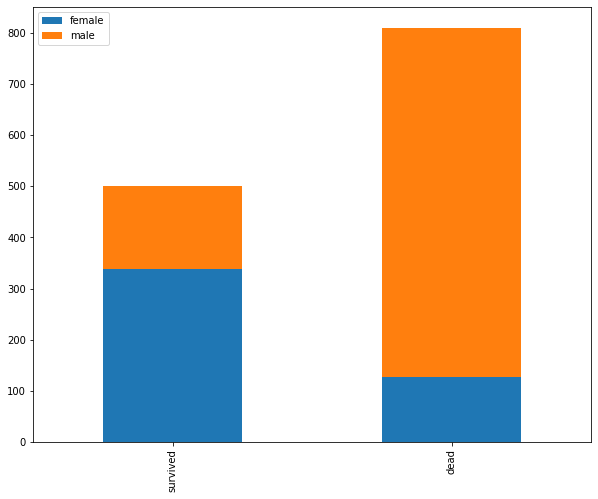

In [25]:
survived_sex = df[df['survived']==1]['sex'].value_counts()
dead_sex = df[df['survived']==0]['sex'].value_counts()
new_data = pd.DataFrame([survived_sex,dead_sex])
new_data.index = ['survived','dead']
new_data.plot(kind='bar',stacked=True, figsize=(10,8))

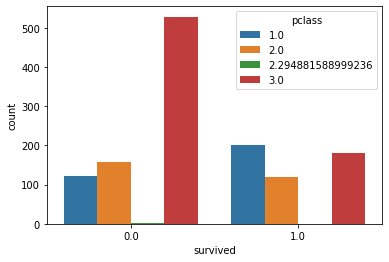

In [26]:
sns.countplot(x='survived',hue='pclass',data=df)

In [27]:
df['sex'] = encoder.fit_transform(df['sex'])

In [28]:
y=df['survived']
x=df.drop('survived' , axis=1)
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.25 , random_state=0)

In [29]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred =logreg.predict(x_test)
print('Accuracy ={:.2f}'.format(logreg.score(x_test,y_test)))

Accuracy =0.85


C:\Users\OFFICE INFO\.conda\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


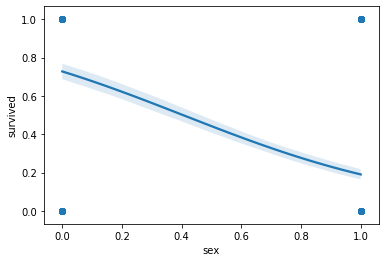

In [30]:
sns.regplot(x='sex',y='survived', data=df , logistic=True)

In [31]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0        191   18
1.0         31   88


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       209
         1.0       0.83      0.74      0.78       119

    accuracy                           0.85       328
   macro avg       0.85      0.83      0.83       328
weighted avg       0.85      0.85      0.85       328

